# Customer Churn Prediction

In [10]:
# Import Libs
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [11]:
# Load Data

df = pd.read_csv('../dataset/Churn_Modelling (1).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

<Axes: >

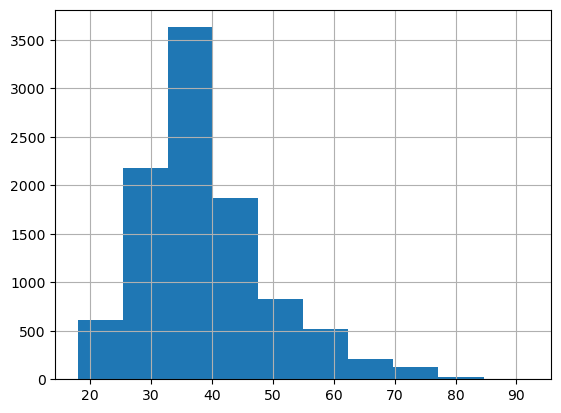

In [18]:
df['Age'].hist()

In [19]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

<Axes: >

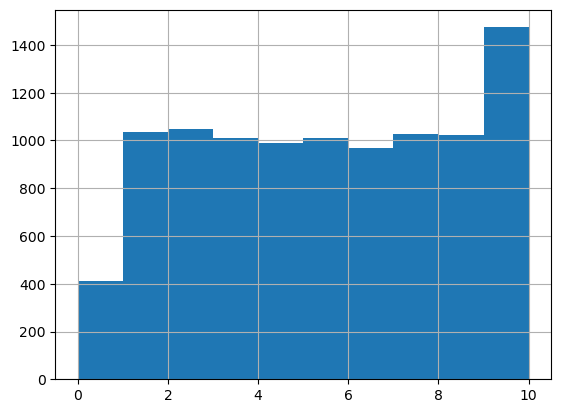

In [20]:
df['Tenure'].hist()

In [21]:
df['Balance'].nunique()

6382

<Axes: ylabel='Frequency'>

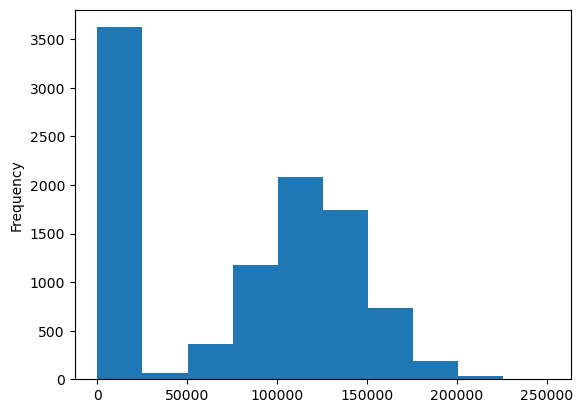

In [22]:
df['Balance'].plot(kind='hist')

In [23]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [24]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [25]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

<Axes: >

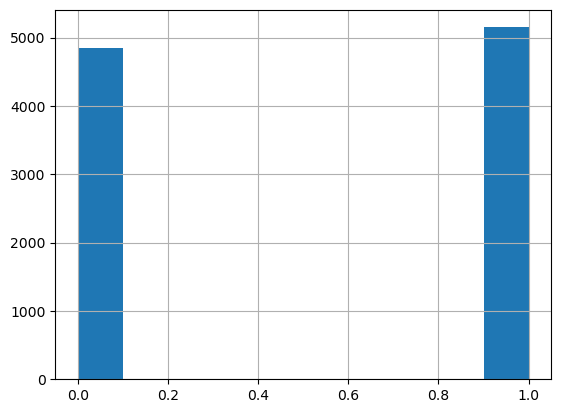

In [26]:
df['IsActiveMember'].hist()

In [27]:
df['Exited'].unique()

array([1, 0], dtype=int64)

<Axes: >

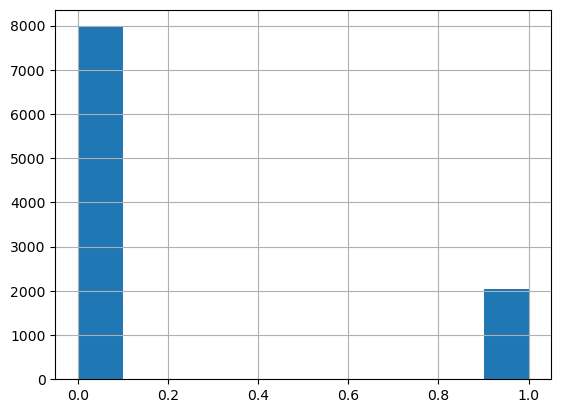

In [28]:
df['Exited'].hist()

In [29]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [30]:
# Import ML Libs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [31]:
encoder = LabelEncoder()
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])
# df['Gender_encoded'] = df['Gender_encoded'].astype('category')

df['Geography_encoded'] = encoder.fit_transform(df['Geography'])
# df['Geography_encoded'] = df['Geography_encoded'].astype('category')

In [32]:
df.corr(numeric_only=True)[['Exited']]

,Exited
RowNumber,-0.016571
CustomerId,-0.006248
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


In [33]:
# Feature Selection 
feature_cols = ['Age', 'Balance', 'IsActiveMember', 'CreditScore', 'Tenure', 'EstimatedSalary', 'Geography_encoded', 'Gender_encoded'] # 'CreditScore', 'Tenure'
target_col = 'Exited'

In [34]:
X = df[feature_cols]
y = df[target_col]

In [35]:
# Spliting to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [37]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [38]:
# Modeling Init
# Model 1
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [39]:
y_pred = log_reg_model.predict(X_test_scaled)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model accuracy: 81.50%


In [41]:
# print(classification_report(y_test, y_pred))

## Using SVM

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
y_train, y_test
X_train_scaled, X_test_scaled 

(array([[-0.6557859 , -1.21847056,  0.97481699, ...,  1.36766974,
         -0.9055496 ,  0.91324755],
        [ 0.29493847,  0.69683765,  0.97481699, ...,  1.6612541 ,
          0.30164867,  0.91324755],
        [-1.41636539,  0.61862909, -1.02583358, ..., -0.25280688,
          1.50884694,  0.91324755],
        ...,
        [-0.08535128, -1.21847056, -1.02583358, ..., -0.1427649 ,
         -0.9055496 , -1.09499335],
        [ 0.3900109 ,  1.8272593 , -1.02583358, ..., -0.05082558,
         -0.9055496 ,  0.91324755],
        [ 1.15059039,  1.1497197 ,  0.97481699, ..., -0.81456811,
          0.30164867,  0.91324755]]),
 array([[-0.67729931,  0.30084641, -1.0502616 , ..., -0.99096946,
          0.32653736,  0.90911166],
        [ 0.38429835, -1.25599716,  0.95214374, ...,  0.8293793 ,
         -0.88735616,  0.90911166],
        [ 0.48080723, -1.25599716, -1.0502616 , ..., -0.69904548,
          1.54043088, -1.09997489],
        ...,
        [ 0.77033387, -1.25599716, -1.0502616 , ..., -

In [45]:
svc_model = SVC()
svc_model

SVC()

In [54]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [58]:
# method 1
svc_model.score(X_test_scaled, y_test)

0.8325

In [62]:
# method 2
y_pred_2 = svc_model.predict(X_test_scaled)

In [64]:
acc = accuracy_score(y_test, y_pred_2) * 100
print(f"SVM model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 83.25%


In [94]:
# save model
import joblib

joblib.dump(svc_model, 'best_customer_churn_prediction.pkl')
joblib.dump(encoder, 'customer_churn_encoder.pkl')
joblib.dump(scaler, 'customer_churn_scaler.pkl')

# Model deployment pipline
# df['Gender_encoded'] = encoder.fit_transform(df['Gender'])
# df['Geography_encoded'] = encoder.fit_transform(df['Geography'])
# # Feature Selection 
# feature_cols = ['Age', 'Balance', 'IsActiveMember', 'CreditScore', 'Tenure', 'EstimatedSalary', 'Geography_encoded', 'Gender_encoded'] # 'CreditScore', 'Tenure'
# target_col = 'Exited'
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# y_pred_2 = svc_model.predict(X_test_scaled)

['customer_churn_scaler.pkl']

## Using DL ANN

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'